In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Specify the path to your CSV file
csv_file_path = 'concat_df.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Now you can work with the data using DataFrame methods
# For example, you can print the first few rows
df


,Unnamed: 0,job_title,job_detail_url,job_listed,company_name,company_link,company_location
0,0,Python Developer,https://www.linkedin.com/jobs/view/python-deve...,2 weeks ago,Two Fish Creative,https://www.linkedin.com/company/two-fish-crea...,"West Palm Beach, FL"
1,1,Python Developer (internship),https://www.linkedin.com/jobs/view/python-deve...,1 month ago,MindPal,https://www.linkedin.com/company/mindpal.co?tr...,"New York, United States"
2,2,Junior Python Developer US/Canada,https://www.linkedin.com/jobs/view/junior-pyth...,10 hours ago,SkyRecruitment,https://www.linkedin.com/company/skyrecruitmen...,"Albert Lea, MN"
3,3,Data Analyst,https://www.linkedin.com/jobs/view/data-analys...,2 hours ago,Coterie,https://www.linkedin.com/company/coterieinc?tr...,"New York, NY"
4,4,Python Developer (internship),https://www.linkedin.com/jobs/view/python-deve...,1 month ago,MindPal,https://www.linkedin.com/company/mindpal.co?tr...,"Seattle, WA"
...,...,...,...,...,...,...,...
1640,1640,School Learning Support Officer - Full Time - ...,https://au.linkedin.com/jobs/view/school-learn...,2 days ago,I work for NSW,https://au.linkedin.com/company/nsw-government...,"Sydney, New South Wales, Australia"
1641,1641,Physiotherapist,https://au.linkedin.com/jobs/view/physiotherap...,2 days ago,Workforce Australia for Individuals,https://www.linkedin.com/company/workforceaust...,"Albany, Western Australia, Australia"
1642,1642,Procurement Officer NEW - SA Health,https://au.linkedin.com/jobs/view/procurement-...,3 hours ago,Department of the Premier and Cabinet (Queensl...,https://au.linkedin.com/company/department-of-...,"Eastwood, South Australia, Australia"
1643,1643,Warehouse Storeperson,https://au.linkedin.com/jobs/view/warehouse-st...,3 days ago,Workforce Australia for Individuals,https://www.linkedin.com/company/workforceaust...,"Perth, Western Australia, Australia"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1645 non-null   int64 
 1   job_title         1645 non-null   object
 2   job_detail_url    1645 non-null   object
 3   job_listed        1645 non-null   object
 4   company_name      1645 non-null   object
 5   company_link      1645 non-null   object
 6   company_location  1645 non-null   object
dtypes: int64(1), object(6)
memory usage: 90.1+ KB


In [3]:
df['job_title'].value_counts()

job_title
Fully Remote Part-Time Tutor                             148
Senior Python Developer                                   83
Python Developer                                          51
Python Developer (internship)                             28
Online Data Analyst                                       23
                                                        ... 
Pricing Analyst - Waterproofing                            1
DevOps Engineer - Senior (Kubernetes) JOB (2023-0222)      1
Scrum Master                                               1
Technical Program Manager                                  1
Production Worker                                          1
Name: count, Length: 827, dtype: int64

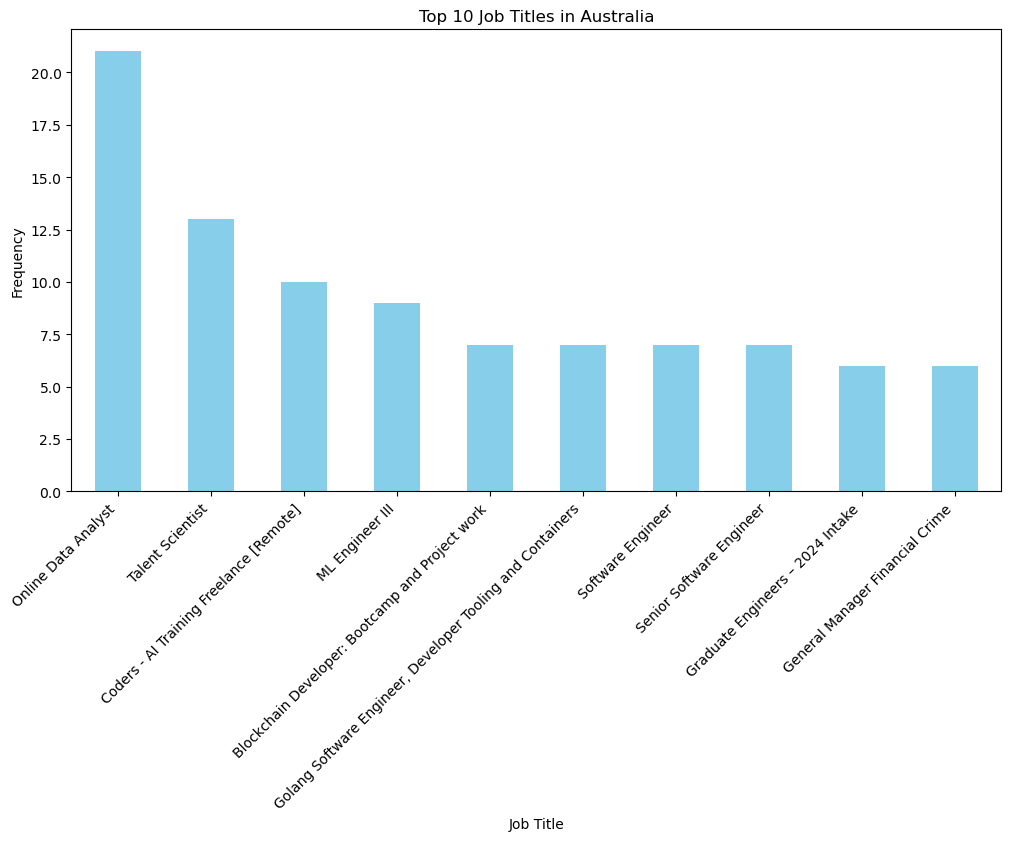

In [4]:

# Filter the dataset for jobs in Australia (adjust the location as needed)
australia_data = df[df['company_location'].str.contains('Australia', case=False)]

# Count the frequency of each job title in Australia
title_counts = australia_data['job_title'].value_counts()

# Select the top 10 job titles
top_10_titles = title_counts.head(10)

# Create a frequency chart for the top 10 job titles
plt.figure(figsize=(12, 6))
top_10_titles.plot(kind='bar', color='skyblue')
plt.title('Top 10 Job Titles in Australia')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


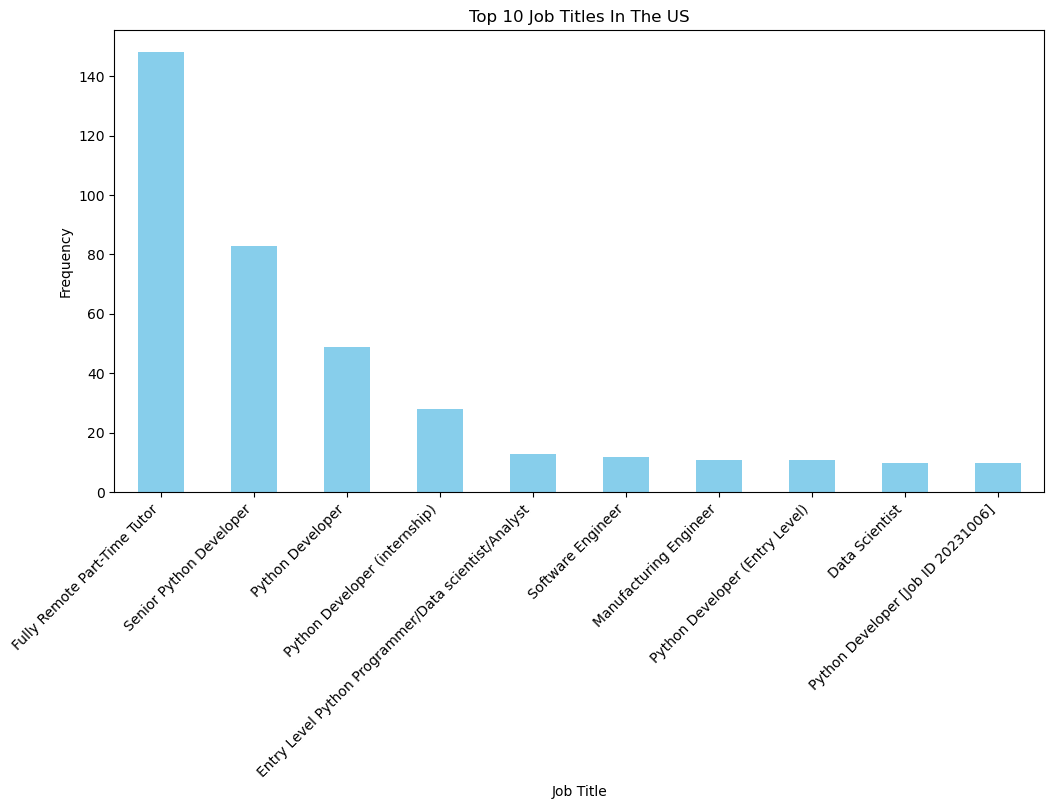

In [5]:
# Filter the dataset for jobs not in Australia
non_australia_data = df[~df['company_location'].str.contains('Australia', case=False)]

# Count the frequency of each job title outside of Australia
title_counts = non_australia_data['job_title'].value_counts()

# Select the top 10 job titles
top_10_titles = title_counts.head(10)

# Create a frequency chart for the top 10 job titles
plt.figure(figsize=(12, 6))
top_10_titles.plot(kind='bar', color='skyblue')
plt.title('Top 10 Job Titles In The US')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

job_title
Fully Remote Part-Time Tutor                            148
Senior Python Developer                                  83
Python Developer                                         49
Python Developer (internship)                            28
Entry Level Python Programmer/Data scientist/Analyst     13
Software Engineer                                        12
Manufacturing Engineer                                   11
Python Developer (Entry Level)                           11
Data Scientist                                           10
Python Developer [Job ID 20231006]                       10
Name: count, dtype: int64

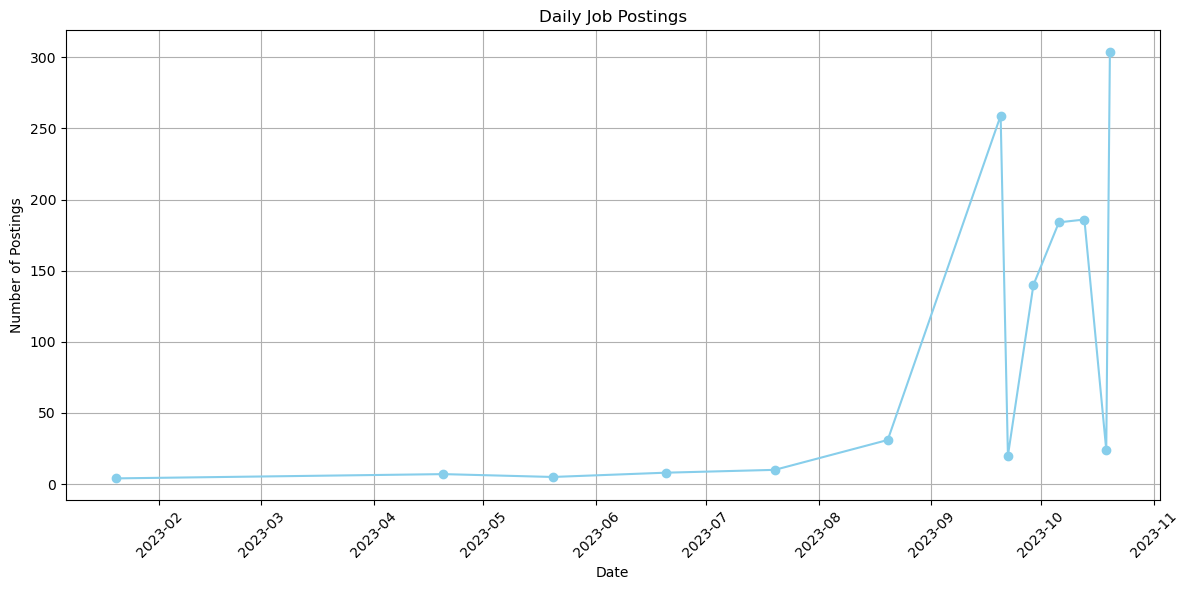

In [7]:

# Function to convert relative dates to actual dates
def convert_relative_dates(date_str):
    if 'week' in date_str:
        weeks_ago = int(re.search(r'\d+', date_str).group())
        return pd.Timestamp.now() - pd.DateOffset(weeks=weeks_ago)
    elif 'hour' in date_str:
        hours_ago = int(re.search(r'\d+', date_str).group())
        return pd.Timestamp.now() - pd.DateOffset(hours=hours_ago)
    elif 'month' in date_str:
        months_ago = int(re.search(r'\d+', date_str).group())
        return pd.Timestamp.now() - pd.DateOffset(months=months_ago)
    else:
        return pd.to_datetime(date_str, errors='coerce')

# Convert the "job_listed" column to actual dates
df['job_listed'] = df['job_listed'].apply(convert_relative_dates)

# Group the data by day and count the number of postings per day
daily_posting_counts = df.groupby(df['job_listed'].dt.date)['job_title'].count()

# Create a DataFrame to display the results
daily_posting_table = pd.DataFrame({'Date': daily_posting_counts.index, 'Postings': daily_posting_counts.values})

# Create a line graph of daily postings
plt.figure(figsize=(12, 6))
plt.plot(daily_posting_table['Date'], daily_posting_table['Postings'], marker='o', color='skyblue')
plt.title('Daily Job Postings')
plt.xlabel('Date')
plt.ylabel('Number of Postings')
plt.xticks(rotation=45)
plt.grid(True)

# Show the graph
plt.tight_layout()
plt.show()